<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Lab 5 - Thresholding
### 2/16/2022
### Alex Lagarde

In [ ]:
# importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

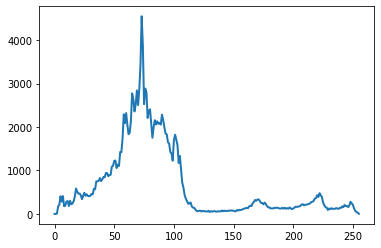

In [ ]:
# 1. Histogram
img = cv2.imread("icecreamcone.JPG")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(hist, linewidth=2)
plt.show()

From looking at this histogram, a threshold of 120 looks to be a good value to separate the foreground and the background as it appears to be the line between two things.There is a increasingly high number of pixels between intensities 10 to 70 and dips to a trough point in the 120 range.

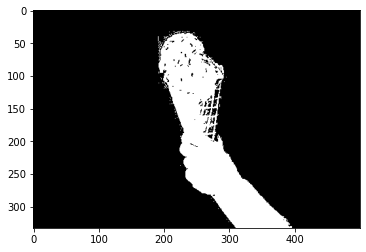

In [ ]:
# 2. Mask Making
ret, thresh = cv2.threshold(gray_image, 120, 250, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap  = 'gray')
plt.show()

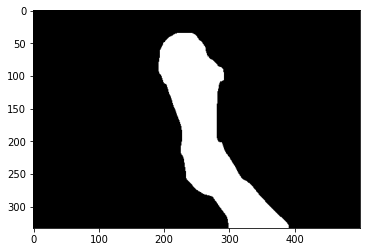

In [ ]:
# adjusting and morphological operations
blur_img = cv2.blur(gray_image, (10, 10))
ret2, thresh2 = cv2.threshold(blur_img, 125, 255, cv2.THRESH_BINARY)
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 40))
strel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
closed = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, strel)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel2)
plt.imshow(opened, cmap  = 'gray')
plt.show()

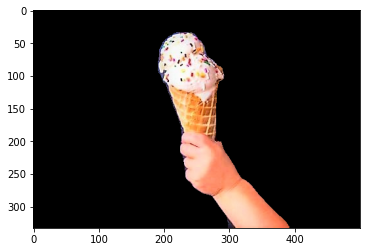

In [ ]:
# use mask with original image
masked = cv2.bitwise_and(img, img, mask=closed)
masked = cv2.cvtColor(masked, cv2.COLOR_RGB2BGR)
plt.imshow(masked)
plt.show()